## Code Along - Exploração e Preprocessamento

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_style('whitegrid')

In [2]:
caminho = '/Users/user/Documents/Pessoal/TensorFlow_FILES/DATA/cancer_classification.csv'
df = pd.read_csv(caminho)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [7]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
mean texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
mean perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
mean area,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
mean smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
mean compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
mean concavity,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
mean concave points,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
mean symmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
mean fractal dimension,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


<Axes: xlabel='benign_0__mal_1', ylabel='count'>

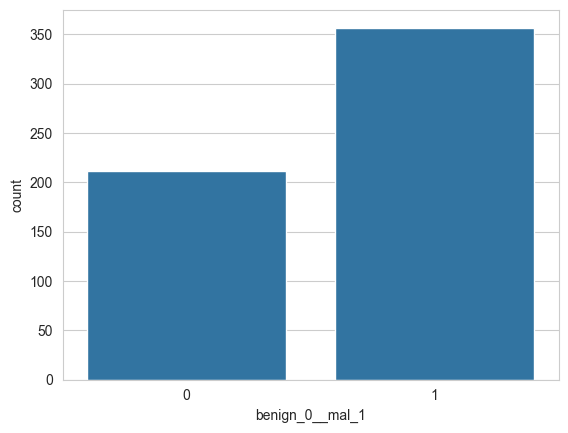

In [3]:
sns.countplot(df, x='benign_0__mal_1')

parece ser um conjunto de dados balanceado, apesar da desproporção

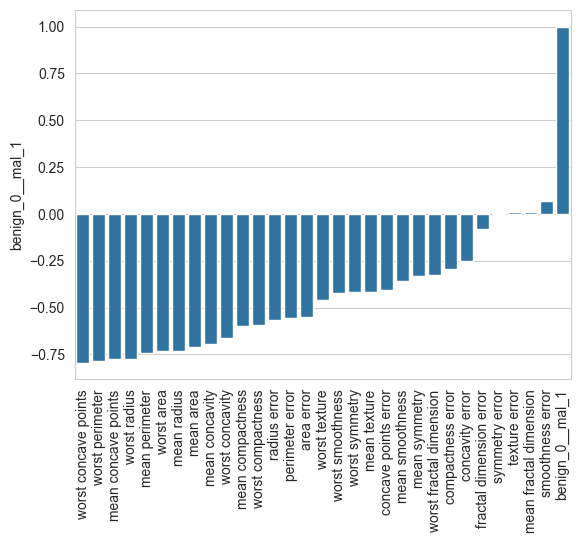

In [16]:
p = sns.barplot(df.corr()['benign_0__mal_1'].sort_values())
p.tick_params(axis='x', rotation=90)

<Axes: >

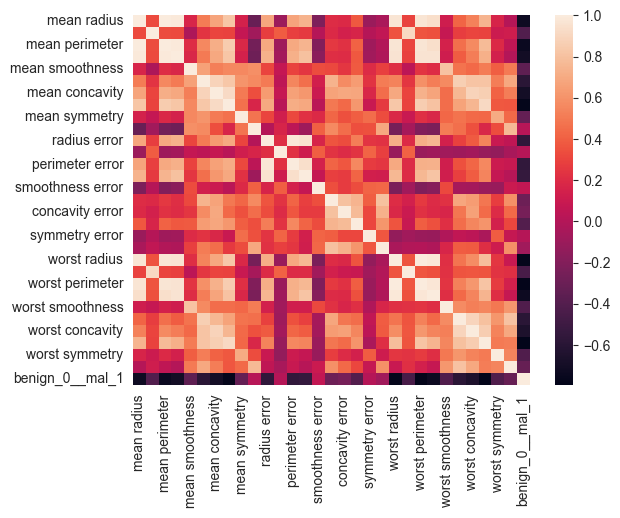

In [17]:
sns.heatmap(df.corr())

In [18]:
X = df.drop('benign_0__mal_1', axis=1)
y = df['benign_0__mal_1']

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

In [22]:
from sklearn.preprocessing import MinMaxScaler

In [23]:
scaler = MinMaxScaler()

In [24]:
X_train = scaler.fit_transform(X_train)

In [25]:
X_test = scaler.transform(X_test)

### Como lidar com Overfitting em um modelo

In [26]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [27]:
X_train.shape

(426, 30)

In [29]:
model = Sequential()

model.add(Dense(30, activation='relu'))
model.add(Dense(15, activation='relu'))

# Classificação bináraise
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam')

In [31]:
model.fit(X_train, y_train,epochs=600, validation_data=(X_test,y_test))

Epoch 1/600
 1/14 [=>............................] - ETA: 0s - loss: 0.6784

14/14 [==============================] - 0s 8ms/step - loss: 0.6481 - val_loss: 0.6184
Epoch 2/600
14/14 [==============================] - 0s 2ms/step - loss: 0.6009 - val_loss: 0.5695
Epoch 3/600
14/14 [==============================] - 0s 2ms/step - loss: 0.5496 - val_loss: 0.5185
Epoch 4/600
14/14 [==============================] - 0s 2ms/step - loss: 0.4999 - val_loss: 0.4676
Epoch 5/600
14/14 [==============================] - 0s 2ms/step - loss: 0.4515 - val_loss: 0.4180
Epoch 6/600
14/14 [==============================] - 0s 2ms/step - loss: 0.4053 - val_loss: 0.3715
Epoch 7/600
14/14 [==============================] - 0s 2ms/step - loss: 0.3614 - val_loss: 0.3286
Epoch 8/600
14/14 [==============================] - 0s 2ms/step - loss: 0.3234 - val_loss: 0.2907
Epoch 9/600
14/14 [==============================] - 0s 2ms/step - loss: 0.2918 - val_loss: 0.2595
Epoch 10/600
14/14 [==============================] - 0s 2ms/step - loss: 0.2652 - val_loss: 0.2389
Epoch 11/600
14/14 [=

In [32]:
losses = pd.DataFrame(model.history.history)

<Axes: >

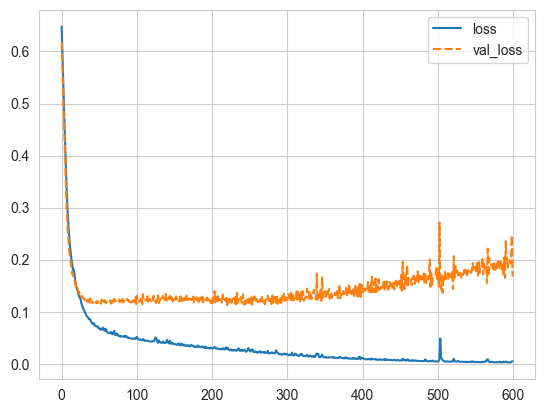

In [33]:
sns.lineplot(losses)

In [34]:
model = Sequential()

model.add(Dense(30, activation='relu'))
model.add(Dense(15, activation='relu'))

# Classificação bináraise
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam')

In [35]:
from tensorflow.keras.callbacks import EarlyStopping

In [36]:
help(EarlyStopping)

Help on class EarlyStopping in module keras.src.callbacks:

class EarlyStopping(Callback)
 |  EarlyStopping(monitor='val_loss', min_delta=0, patience=0, verbose=0, mode='auto', baseline=None, restore_best_weights=False, start_from_epoch=0)
 |  
 |  Stop training when a monitored metric has stopped improving.
 |  
 |  Assuming the goal of a training is to minimize the loss. With this, the
 |  metric to be monitored would be `'loss'`, and mode would be `'min'`. A
 |  `model.fit()` training loop will check at end of every epoch whether
 |  the loss is no longer decreasing, considering the `min_delta` and
 |  `patience` if applicable. Once it's found no longer decreasing,
 |  `model.stop_training` is marked True and the training terminates.
 |  
 |  The quantity to be monitored needs to be available in `logs` dict.
 |  To make it so, pass the loss or metrics at `model.compile()`.
 |  
 |  Args:
 |    monitor: Quantity to be monitored.
 |    min_delta: Minimum change in the monitored quanti

In [37]:
early_stop = EarlyStopping(monitor='val_loss', mode='min',
                           verbose=1, patience=25)

In [38]:
model.fit(X_train, y_train,epochs=600, validation_data=(X_test,y_test),
          callbacks=[early_stop])

Epoch 1/600
14/14 [==============================] - 0s 6ms/step - loss: 0.7037 - val_loss: 0.6896
Epoch 2/600
14/14 [==============================] - 0s 2ms/step - loss: 0.6663 - val_loss: 0.6499
Epoch 3/600
14/14 [==============================] - 0s 2ms/step - loss: 0.6275 - val_loss: 0.6065
Epoch 4/600
14/14 [==============================] - 0s 2ms/step - loss: 0.5864 - val_loss: 0.5616
Epoch 5/600
14/14 [==============================] - 0s 2ms/step - loss: 0.5384 - val_loss: 0.5109
Epoch 6/600
14/14 [==============================] - 0s 2ms/step - loss: 0.4844 - val_loss: 0.4520
Epoch 7/600
14/14 [==============================] - 0s 2ms/step - loss: 0.4299 - val_loss: 0.3967
Epoch 8/600
14/14 [==============================] - 0s 2ms/step - loss: 0.3803 - val_loss: 0.3480
Epoch 9/600
14/14 [==============================] - 0s 2ms/step - loss: 0.3378 - val_loss: 0.3101
Epoch 10/600
14/14 [==============================] - 0s 2ms/step - loss: 0.3061 - val_loss: 0.2775
Epoch 11/

<Axes: >

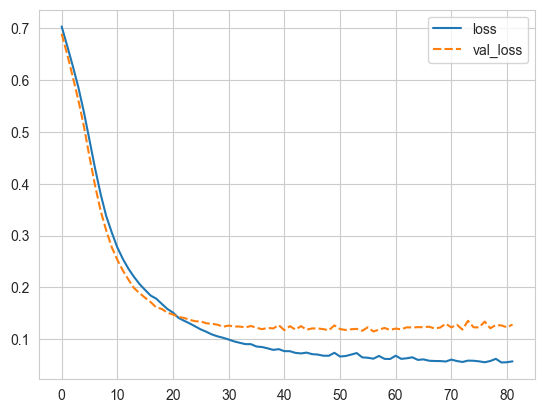

In [40]:
losses = pd.DataFrame(model.history.history)
sns.lineplot(losses)

In [41]:
from tensorflow.keras.layers import Dropout

In [56]:
model = Sequential()

model.add(Dense(30, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(15, activation='relu'))
model.add(Dropout(0.5))

# Classificação bináraise
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam')

In [57]:
early_stop = EarlyStopping(monitor='val_loss', mode='min',
                           verbose=1, patience=25)

In [58]:
model.fit(X_train, y_train,epochs=600, validation_data=(X_test,y_test),
          callbacks=[early_stop])

Epoch 1/600
14/14 [==============================] - 0s 6ms/step - loss: 0.6907 - val_loss: 0.6584
Epoch 2/600
14/14 [==============================] - 0s 2ms/step - loss: 0.6693 - val_loss: 0.6364
Epoch 3/600
14/14 [==============================] - 0s 2ms/step - loss: 0.6561 - val_loss: 0.6114
Epoch 4/600
14/14 [==============================] - 0s 2ms/step - loss: 0.6321 - val_loss: 0.5867
Epoch 5/600
14/14 [==============================] - 0s 2ms/step - loss: 0.6118 - val_loss: 0.5621
Epoch 6/600
14/14 [==============================] - 0s 2ms/step - loss: 0.5930 - val_loss: 0.5376
Epoch 7/600
14/14 [==============================] - 0s 2ms/step - loss: 0.5671 - val_loss: 0.5111
Epoch 8/600
14/14 [==============================] - 0s 2ms/step - loss: 0.5316 - val_loss: 0.4803
Epoch 9/600
14/14 [==============================] - 0s 2ms/step - loss: 0.5245 - val_loss: 0.4481
Epoch 10/600
14/14 [==============================] - 0s 2ms/step - loss: 0.4998 - val_loss: 0.4201
Epoch 11/

In [59]:
losses = pd.DataFrame(model.history.history)

<Axes: >

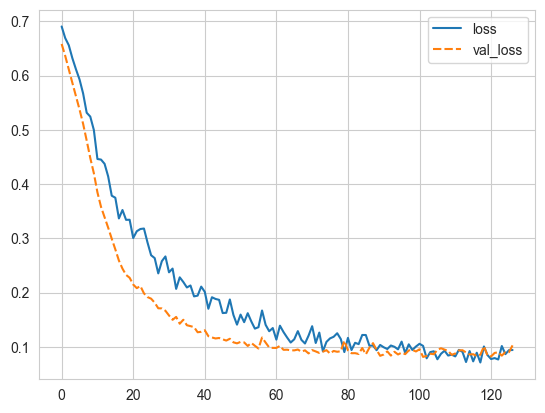

In [60]:
sns.lineplot(losses)

### Avaliação do modelo

In [71]:
pred = model.predict(X_test)

5/5 [==============================] - 0s 737us/step


In [72]:
pred = list(map(int, (pred > 0.5)))

/var/folders/nx/h3lp3lcs6s11kph621s_r81w0000gq/T/ipykernel_56546/2298409241.py:1: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  pred = list(map(int, (pred > 0.5)))


In [52]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [73]:
print(confusion_matrix(y_test,pred))

[[54  1]
 [ 4 84]]


In [74]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.93      0.98      0.96        55
           1       0.99      0.95      0.97        88

    accuracy                           0.97       143
   macro avg       0.96      0.97      0.96       143
weighted avg       0.97      0.97      0.97       143

